In [3]:
import numba
import numpy as np


**Funciones de prueba:**

In [4]:
@numba.njit
def Sphere(arr):
    """
    Esta función recibe como parámetro un vector de n entradas, ingresado como un np.array,
    y devuelve el escalar que resulta de evaluar la función de la esfera en el vector.
    Se usa en el intervalo de búsqueda [-5.12, 5.12] y su óptimo global está en f([0,..,0])=0

    Ejemplo de uso:
        > Sphere(np.array([0, 0]))

        > 0
    """
    suma = 0.0  # Usar un float para la suma
    for x in arr:
        suma += x ** 2
    return suma

intervaloSphere = (-5.12, 5.12)


# Ejemplo de uso (y compilación AOT)
resultado = Sphere(np.array([1.0, 2.0, 3.0]))
print(resultado)


14.0


In [5]:
@numba.njit
def Ackley(arr):
    """
    Esta función recibe como parámetro un vector de n entradas, ingresado como un np.array,
    y devuelve el escalar que resulta de evaluar la función Ackley en el vector.
    Se usa en el intervalo de búsqueda [-30, 30] y su óptimo global está en f([0,..,0])=0.

    Ejemplo de uso:
        > Ackley(np.array([0, 0]))

        > 0
    """
    suma1 = 0.0
    suma2 = 0.0
    n = arr.shape[0]  # Usar el tamaño del array de NumPy
    for x in arr:
        suma1 += x ** 2
        suma2 += np.cos(2 * np.pi * x)
    
    # Calcular el resultado de la función Ackley
    term1 = 20 + np.exp(1) - 20 * np.exp(-0.2 * np.sqrt(suma1 / n))
    term2 = np.exp(suma2 / n)
    return term1 - term2

intervaloAckley = (-30, 30)

# Ejemplo de uso (y compilación AOT)
resultado = Ackley(np.array([0, 0]))
print(resultado)  # Debería imprimir un valor cercano a 0


-4.440892098500626e-16


In [6]:
@numba.njit
def Griewank(arr):
    """
    Esta función recibe como parámetro un vector de n entradas, ingresado como un np.array,
    y devuelve el escalar que resulta de evaluar la función Griewank en el vector.
    Se usa en el intervalo de búsqueda [-600, 600] y su óptimo global está en f([0,..,0])=0.

    Ejemplo de uso:
        > Griewank(np.array([0, 0]))

        > 0
    """
    suma = 0.0
    m = 1.0  # Inicializar en 1 para la multiplicación de cosenos
    n = arr.shape[0]  # Obtener el número de elementos en el array

    for i in range(1, n + 1):
        x_i = arr[i - 1]  # Acceder al elemento en el índice correspondiente
        suma += (x_i ** 2) / 4000.0  # Sumar la parte de la función
        m *= np.cos(x_i / np.sqrt(i))  # Multiplicar por el coseno

    return 1 + suma - m

intervaloGriewank = (-600, 600)

# Ejemplo de uso (y compilación AOT)
resultado = Griewank(np.array([0, 0]))
print(resultado)  # Debería imprimir 0.0


0.0


In [7]:
@numba.njit
def Rastrigin(arr):
    """
    Esta función recibe como parámetro un vector de n entradas, ingresado como un np.array,
    y devuelve el escalar que resulta de evaluar la función de Rastrigin en el vector.
    Tiene mínimo global en f([0,..,0]).

    Ejemplo de uso:
        > Rastrigin(np.array([2, 3, 6, 7]))

        > 98.0
    """
    n = arr.shape[0]  # Obtener el número de elementos en el array
    suma = 0.0

    for x in arr:
        suma += x ** 2 - 10 * np.cos(2 * np.pi * x)  # Calcular la suma de la función Rastrigin

    return 10 * n + suma  # Retornar el resultado final

intervaloRastrigin = (-5.12, 5.12)

# Ejemplo de uso (y compilación AOT)
resultado = Rastrigin(np.array([2, 3, 6, 7]))
print(resultado)  # Debería imprimir 98.0


98.0


In [8]:
@numba.njit
def Rosenbrock(x):
    """
    Esta función recibe como parámetro un vector de n entradas, ingresado como un array de NumPy
    y devuelve el escalar que resulta de evaluar la función de Rosenbrock en el vector.
    Tiene un mínimo global en f(1, ..., 1).

    Ejemplo de uso:
      > Rosenbrock(np.array([1, 1]))
      > 0
    """
    n = x.shape[0]  # Obtener el tamaño del array
    suma = 0.0
    for i in range(n - 1):
        suma += 100 * (x[i + 1] - (x[i]) ** 2) ** 2 + (x[i] - 1) ** 2
    return suma

intervaloRosenbrock = (-2.048, 2.048)

# Ejemplo de uso (y compilación AOT)
resultado = Rosenbrock(np.array([1, 1]))
print(resultado)  # Debería imprimir 0.0


0.0


**Funciones del algoritmo genético.**

In [9]:
kindividuos = 35 
dimension = 10
intervalo = intervaloRosenbrock
funcion = Rosenbrock
nBits = 20
nCortes = 15
probaMutacion = 0.5
iteraciones = 1000


In [10]:
'''Función que nos genera una población inicial de 2k individuos y 
   recibe como parámetros: La 'k' y el hipercubo al que pertenecen 
   los vectores (o sea, la dimensión 'n' y el intervalo [a,b] al que
   pertenecen cada una de las entradas de los vectores).'''

import numpy as np

@numba.njit
def Generar_Poblacion(k, n, intervalo):
    
   a, b = intervalo

   # Se genera una matriz de tamaño (2k, n) con valores aleatorios
   # uniformes (o sea, una población inicial de 2k individuos donde 
   # cada uno vive en Rn):
   poblacionMatriz = np.random.uniform(a,b, size=(2*k, n))
   

   return poblacionMatriz # No hacemos la conversión en lista de listas
                          # porque necesitamos de `numba`.


In [11]:
# Ejemplo de uso (y compilación AOT)

pob = Generar_Poblacion(kindividuos, dimension, intervalo)
print(pob[0])


[-0.18815386  0.76768026  0.07566934  1.68878948  1.01038035 -0.14759543
 -1.58101697 -1.4459271  -1.63821702 -1.34722799]


In [12]:
'''Definimos una función de aptitud que recibe como parámetros una
   función de prueba y una población de 2k individuos y retorna una
   lista con las probabilidades de selección (p_i) de todos los 
   individuos de la población, el mejor individuo en la población,
   la mejor evaluación de éste y el promedio de las evaluaciones.'''


# `aptitud` es un parámetro opcional sólo para elegir qué retorna la 
# función.
@numba.njit
def Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion, aptitud=1):
    
    # Necesitamos el número de individuos de la población:
    numIndividuos = len(poblacion) 
    
    # Generamos un array con las evaluaciones en la función objetivo
    evaluaciones = np.empty(numIndividuos) # Primero generamos un array
                                           # vacío de tamaño adecuado.
    for i in range(numIndividuos):
        evaluaciones[i] = funcion(poblacion[i])

    # Generamos un array de las aptitudes de los individuos en la 
    # población.
    aptitudes = np.exp(1e-9 * (-evaluaciones))

    # Encontramos el índice del mejor individuo (menor evaluación)
    mejorIndice = np.argmax(aptitudes)
    masApto = poblacion[mejorIndice]

    # Obtenemos el 'tamaño del pastel':
    sumaAptitudes = np.sum(aptitudes)

    # Calculamos las probabilidades de selección (p_i) para todos los
    # individuos:
    probabilidades = aptitudes / sumaAptitudes

    # Inicializamos mejorEval y promedioEva
    mejorEval = np.nan
    promedioEval = np.nan

    # Si aptitud es distinto de 0, calculamos mejor aptitud y promedio de aptitudes
    if aptitud != 0:
        mejorEval = evaluaciones[mejorIndice]
        promedioEval = np.mean(evaluaciones)

    return probabilidades, masApto, mejorEval, promedioEval


In [13]:
# Ejemplo de uso (y compilación AOT)
probas, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, pob)

print(probas[0], masApto[0], mejorEval, promedioEval)


0.01428569370080571 1.5333579268436943 723.8154152686451 4250.738523924745


In [14]:
'''Definimos una función que recibe la lista de probabilidades 
   de selección y nos retorna la que corresponde a la de las 
   probabilidades acumulativas.'''

@numba.njit
def Probas_Acumulativas(probabilidades):

    # Calculamos las probabilidades acumulativas (q_i) para todos los
    # individuos:
    probasAcumulativas = np.cumsum(probabilidades)

    return probasAcumulativas # Retornamos las `probasAcumulativas` como
                              # un arreglo de NumPy (igual es iterable).


In [15]:
# Ejemplo de uso (y compilación AOT)
qis = Probas_Acumulativas(probas)
print(qis[16])


0.24285697953705196


Padres mediante el uso de la ruleta:

In [16]:
'''Estas funciones son las que nos ayudan a generar a los padres mediante
   el uso de la ruleta.'''
   

'''La primera es para seleccionar padres (uno) y recibe como parámetro 
   la lista de las probabilidades acumulativas.
   
   Nos retornará el índice en la lista que le corresponde al padre 
   elegido con esa regla.'''

@numba.njit
def Seleccionar_Padre_Ruleta(probasAcumuladas):
   r = np.random.random() # Generamos un número aleatorio entre 0 y 1

   tol=1e-9
   
   # Recorremos las probabilidades acumuladas para seleccionar el padre
   for i in range(len(probasAcumuladas)):
      if r <= probasAcumuladas[i] or np.isclose(r, probasAcumuladas[i], atol=tol):
         return i  # Índice del individuo seleccionado
               
   return -1  # En caso de que no se seleccione, aunque esto no debería suceder.


In [17]:
'''La segunda es para generar la lista de padres elegidos para 
   reproducirse. Necesitamos 2k nuevos individuos, así que se van a 
   elegir k parejas (cada par de padres produce dos hijos).
   La función recibe como parámetros: la lista de individuos, las
   probabilidades acumulativas y un máximo de intentos para intentar evitar
   la generación de clones (en este caso, vamos a considerar un máximo
   de 100 para cada elección de un segundo padre, pero tenemos la 
   apertura de modificarlo después).
   Retorna la lista de parejas de padres elegidos.'''

@numba.njit
def Generar_Parejas(individuos, probasAcumuladas, maxIntentos=100):
    
    numIndividuos = len(individuos)

    # Validación: si no hay suficientes individuos
    if numIndividuos < 2:
        print("Error: No hay suficientes individuos para generar parejas.")
        return np.empty((0, 2, individuos.shape[1]))
        # Regresamos un array vacío

    # Como len(individuos) = 2k, le pedimos que elija len(individuos)/2 
    # parejas de padres.
    parejasNecesarias = numIndividuos // 2
    
    
    parejas_idxs = np.empty((parejasNecesarias, 2), dtype=np.int32)
    # Creamos un array para los índices de tamaño adecuado.
    # Como queremos parejas, el array tiene dos columnas, la idea es que
    # cada fila del array represente una pareja de padres.

    '''En otras palabras, `parejas_idxs` tendrá la forma:
       [[padre1_idx1, padre2_idx1],
       [padre1_idx2, padre2_idx2],
       [padre1_idx3, padre2_idx3],
       ...
       [padre1_idxN, padre2_idxN]]'''


    for i in range(parejasNecesarias):
        padre1_idx = Seleccionar_Padre_Ruleta(probasAcumuladas)

        intentos = 0
        while True:
            padre2_idx = Seleccionar_Padre_Ruleta(probasAcumuladas)
            if padre1_idx != padre2_idx:
                break  # Padres diferentes, salimos del ciclo
            intentos += 1 # No encontramos un padre distinto, hacemos 
                          # otro intento.
            if intentos >= maxIntentos: # Rebasamos los intentos que
                                        # teníamos permitidos.
                padre2_idx = padre1_idx # Aceptamos el clon.
                break

        parejas_idxs[i, 0] = padre1_idx # Primer padre se asigna en la
                                        # fila `i` de la primer columna.
        parejas_idxs[i, 1] = padre2_idx # Segundo padre se asigna en la
                                        # fila `i` de la segunda columna.

    # Ahora construimos el array de parejas usando los índices generados
    # para almacenar las parejas de individuos.
    parejas = np.empty((parejasNecesarias, 2, individuos.shape[1]), dtype=individuos.dtype)
    
    for i in range(parejasNecesarias):
        parejas[i, 0] = individuos[parejas_idxs[i, 0]]  # Primer padre
        parejas[i, 1] = individuos[parejas_idxs[i, 1]]  # Segundo padre

    
    return parejas


In [18]:
# Ejemplo de uso (y compilación AOT)
padres = Generar_Parejas(pob, qis)
print(padres[0])


[[ 0.70118518 -1.54426663 -1.85651184 -0.63611111 -0.89370332  0.50333439
   0.6209609   0.51058758  0.03747846 -0.60116302]
 [ 0.42626357 -0.22990725  1.79120098  1.0247844  -1.77989578  0.13312429
  -1.86538646 -0.34474575  1.80261886 -0.74373397]]


Funciones auxiliares para la codificación en binario:

In [19]:
@numba.njit
def codifica_real(x, n_bit, intervalo):
    """
    Codifica un número real en el intervalo [a,b] utilizando n_bit bits
    y una partición uniforme en [a, b].

    Parámetros:
    x: número real a codificar.
    n_bit: número de bits a utilizar.
    intervalo: (a, b), extremos del intervalo.

    Retorno:
    Arreglo binario que representa al número real x con n_bit bits
    en el intervalo [a, b].
    """
    a, b = intervalo

    # Calcula la precisión de la representación.
    precision = (b - a) / ((2 ** n_bit) - 1)

    # Asegura que el número esté dentro del rango de la partición.
    x = max(a, min(b, x))

    # Calcula el índice del número en la partición.
    index = int((x - a) / precision)

    # Codifica el índice a binario
    if index < 0 or index >= (1 << n_bit):
        raise ValueError(f"Índice fuera del rango representable con {n_bit} bits.")

    x_binario = np.zeros(n_bit, dtype=np.int32)
    for i in range(n_bit - 1, -1, -1):
        x_binario[i] = index & 1
        index >>= 1

    return x_binario

@numba.njit
def codifica_vector(vector_reales, n_bit, intervalo):
    """
    Codifica un vector de números reales en un vector de vectores binarios
    utilizando n_bit bits.

    Parámetros:
    vector_reales: Arreglo de números reales a codificar
    n_bit: Número de bits a utilizar para las entradas de nuestro arreglo.
    intervalo: (a, b), extremos del intervalo.

    Retorno:
    Arreglo de arreglos binarios, donde cada sub-arreglo representa un número real
    codificado en binario.
    """
    dim_x = vector_reales.shape[0]

    # Inicializa un arreglo vacío para almacenar los vectores binarios.
    vector_binario = np.empty((dim_x, n_bit), dtype=np.int32)

    for i in range(dim_x):
        vector_binario[i] = codifica_real(vector_reales[i], n_bit, intervalo)

    return vector_binario



In [20]:
'''Función que reciba la lista de parejas de padres seleccionadas
   para la reproducción, el número de `nBits` para la codificación
   en binario y el intervalo donde se encuentran las entradas de 
   los vectores.
   Retorna las parejas de padres seleccionadas para la reproducción
   como parejas de arreglos de bits.'''

@numba.njit
def Padres_Binarios(parejas, nBits, intervalo):
    """
    Codifica parejas de vectores en binario.
    """
    numParejas = parejas.shape[0]
    parejasBinarias = np.empty((numParejas, 2, parejas.shape[2], nBits), dtype=np.int32)

    for i in range(numParejas):
        padre1 = parejas[i, 0]  # Vector 1
        padre2 = parejas[i, 1]  # Vector 2

        # Codifica cada padre en binario y lo almacena.
        parejasBinarias[i, 0] = codifica_vector(padre1, nBits, intervalo)
        parejasBinarias[i, 1] = codifica_vector(padre2, nBits, intervalo)

    return parejasBinarias


In [21]:
# Ejemplo de uso (y compilación AOT)
padresBinarios = Padres_Binarios(padres, nBits, intervalo)
print(padresBinarios[0,0])


[[1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1]
 [0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0]
 [0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1]
 [0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1]
 [1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0]
 [1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1]
 [1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1]
 [1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1]
 [0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1]]


In [22]:
'''Función que realiza la cruza de n puntos. Recibe como parámetros: el
   array de los padres (en arreglos binarios), el número de cortes que 
   se quieren hacer por cromosoma.Retorna una lista de 2k hijos (como 
   arreglos binarios).'''

@numba.njit
def Cruza_N_Puntos_np_numba(padres, nPuntos):
    numParejas = padres.shape[0]  # Número de parejas de padres
    numCromosomas = padres[0, 0].shape[0]  # Número de cromosomas por padre (filas)
    numGenes = padres[0, 0].shape[1]  # Número de genes por cromosoma (columnas)

    # Inicializamos un array vacío para almacenar los hijos
    hijos = np.empty((2 * numParejas, numCromosomas, numGenes), dtype=np.int32)

    # Iteramos sobre cada pareja de padres
    for pareja_idx in range(numParejas):
        padre1 = padres[pareja_idx, 0]
        padre2 = padres[pareja_idx, 1]

        # Generamos los arrays vacíos para los hijos de la pareja actual
        hijo1 = np.empty_like(padre1)
        hijo2 = np.empty_like(padre2)

        # Generar n puntos de corte únicos
        puntosCorte = np.random.choice(np.arange(1, numGenes), nPuntos, replace=False)
                      # `replace=False` es para garantizar que los puntos de corte sí
                      # sean diferentes.
        puntosCorte.sort()  # Asegura que los puntos de corte están ordenados.

        # Iteramos sobre cada cromosoma de los padres
        for cromo_idx in range(numCromosomas):
            cromo1 = padre1[cromo_idx]
            cromo2 = padre2[cromo_idx]

            # Alternamos segmentos entre los padres
            ultimo_punto = 0
            switch = False

            for punto in np.append(puntosCorte, numGenes):  # Añadimos el último punto
                if switch:
                    hijo1[cromo_idx, ultimo_punto:punto] = cromo2[ultimo_punto:punto]
                    hijo2[cromo_idx, ultimo_punto:punto] = cromo1[ultimo_punto:punto]
                else:
                    hijo1[cromo_idx, ultimo_punto:punto] = cromo1[ultimo_punto:punto]
                    hijo2[cromo_idx, ultimo_punto:punto] = cromo2[ultimo_punto:punto]

                switch = not switch
                ultimo_punto = punto

        # Guardamos los hijos generados en el array de hijos
        hijos[2 * pareja_idx] = hijo1
        hijos[2 * pareja_idx + 1] = hijo2

    return hijos


In [23]:
# Ejemplo de uso (y compilación AOT)

hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)
print(hijosBinarios[0])
print(type(hijosBinarios))


[[1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0]
 [0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1]
 [0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0]
 [0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0]
 [1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1]
 [1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0]
 [1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1]
 [0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1]]
<class 'numpy.ndarray'>


In [24]:
'''Operador de mutación de un bit: Recibe como parámetros
   la lista de los hijos como arreglos de bits y una 
   probabilidad de mutación.
   Itera por cada hijo y por cada cromosoma, en este último
   genera un número aleatorio para determinar si habrá una
   mutación en dicho cromosoma; de ser así, se elige un bit 
   al azar y se cambia su valor.
   Se retorna la lista de los hijos (posiblemente) mutados.'''

@numba.njit
def Mutador_1_flip_np_numba(hijosBinarios, probaMutacion):
    
    # Obtenemos el número de individuos y cromosomas
    numHijos = hijosBinarios.shape[0]
    numCromosomas = hijosBinarios.shape[1]
    
    numBits = hijosBinarios.shape[2]

    hijosMutados = np.copy(hijosBinarios)
    
    # Recorremos cada individuo
    for i in range(numHijos):
        # Recorremos cada cromosoma del individuo
        for j in range(numCromosomas):
            # Generamos un número aleatorio
            if np.random.rand() < probaMutacion:
                # Elegimos un bit al azar dentro del cromosoma
                bit_a_flip = np.random.randint(0, numBits)
                # Mutar el bit
                hijosMutados[i, j, bit_a_flip] ^= 1  # Flip bit
                # Modificamos directamente sobre hijosBinarios porque
                # a los que realmente consideraremos como hijos en cada
                # generación es a los generados después de la reproducción
                # y mutación.

    return hijosMutados


In [25]:
# Ejemplo de uso (y compilación AOT)
hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)
print(hijosMutados[0])

print(type(hijosMutados))


[[1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0]
 [0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1]
 [0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0]
 [0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0]
 [1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1]
 [1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1]
 [0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0]
 [1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1]
 [0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1]]
<class 'numpy.ndarray'>


In [26]:
@numba.njit
def Hijos_Decodificados(hijosMutados, nBits, intervalo):
    """
    Decodifica un array de hijos mutados en números reales.

    Parámetros:
    hijosMutados: np.array de hijos mutados, donde cada hijo es un vector de bits
    nBits: número de bits a utilizar para cada número
    intervalo: de la forma [a, b]

    Retorno:
    np.array de números reales decodificados
    """
    
    num_hijos = hijosMutados.shape[0]      # Obtenemos el número de hijos
    num_cromosomas = hijosMutados.shape[1]  # Obtenemos el número de cromosomas
    
    # Crea un array vacío para los hijos decodificados
    hijosDecodificados = np.empty((num_hijos, num_cromosomas))  # De la forma correcta

    for i in range(num_hijos):
        for j in range(num_cromosomas):
            hijoMutado = hijosMutados[i, j]  # Acceder al cromosoma
            
            # Decodificación directa del cromosoma
            a, b = intervalo
            precision = (b - a) / ((2 ** nBits) - 1)  # Calcula la precisión de la representación
            # Convierte el vector de bits en un número entero
            indice = 0
            for bit in range(nBits):
                indice += hijoMutado[bit] * (2 ** (nBits - 1 - bit))  # Cálculo del valor decimal
            hijoDecodificado = a + indice * precision  # Calcula el número real decodificado
            
            # Almacena el resultado en el array de salida
            hijosDecodificados[i, j] = hijoDecodificado

    return hijosDecodificados


In [27]:
# Ejemplo de uso (y compilación AOT)
hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
print(hijosDecodificados[0])

print(type(hijosDecodificados))


[ 0.18702557 -0.16490836 -0.32053742 -0.76621753 -2.03571093  0.40537343
  0.23086545 -0.00991993  1.54785109 -0.75965893]
<class 'numpy.ndarray'>


Funciones que realizan el reemplazo generacional:

In [28]:
'''Función que realiza el reemplazo con elitismo.'''

@numba.njit
def Reemplazo_Elitismo(hijosDecodificados, masApto):

    numHijos, dimension = hijosDecodificados.shape

    # Elegimos el índice de un hijo al azar para eliminarlo:
    idx_aleatorio = np.random.randint(0, numHijos)

    # Creamos un nuevo array sin el hijo borrado:
    hijosReducidos = np.empty((numHijos-1, dimension))
    contador = 0
    for i in range(numHijos):
        if i != idx_aleatorio:
            hijosReducidos[contador, :] = hijosDecodificados[i, :]
            contador += 1

    # Creamos un nuevo array con el más apto antes de la reproducción:
    siguienteGeneracion = np.empty((numHijos, dimension))
    for i in range(numHijos-1):
        siguienteGeneracion[i, :] = hijosReducidos[i, :]
    siguienteGeneracion[numHijos-1, :] = masApto

    return siguienteGeneracion


In [29]:
# Ejemplo de uso (y compilación AOT)
siguienteGen = Reemplazo_Elitismo(hijosDecodificados, masApto)
print(siguienteGen[-1])

print(type(siguienteGen))


[ 1.53335793  1.54598996  0.5606189   0.30628048 -0.09553672  0.44203286
 -0.13811462  0.7421757  -0.68844999 -0.40911662]
<class 'numpy.ndarray'>


In [30]:
'''Función que realiza el reemplazo generacional completo.'''

@numba.njit
def Reemplazo_Generacional(hijosDecodificados):
    
    # Hacemos el reemplazo generacional completo:
    siguienteGen = np.copy(hijosDecodificados)

    return siguienteGen
    

In [31]:
# Ejemplo de uso (y compilación AOT)
siguienteGen = Reemplazo_Generacional(hijosDecodificados)
print(siguienteGen[-1])


[-1.65572228  1.70235123 -0.15997476  1.29946804  0.31740851 -0.67519791
  1.79123413 -0.72269795  1.1879523  -1.8753553 ]


In [32]:
'''Función que realiza el reemplazo de los peores.
   Como parámetro tenemos la fracción de la (función
   piso) población que queremos reemplazar.'''

@numba.njit
def Reemplazo_Peores(hijosDecodificados, poblacion, funcion, 
                     fraccionReemplazo):

    # Verificamos que la fracción de reemplazo esté entre 0 y 1
    assert 0 < fraccionReemplazo <= 1, "La fracción de reemplazo debe estar entre 0 y 1"
    
    # Número de individuos a reemplazar (fracción de los peores)
    numReemplazos = int(fraccionReemplazo * len(poblacion))

    # Calculamos las evaluaciones de todos los individuos en 
    # la `poblacion` (la actual, donde están los padres)
    evaluaciones = np.empty(len(poblacion)) # Array vacío
    for i in range(len(poblacion)):
        evaluaciones[i] = funcion(poblacion[i])

    # Calculamos las aptitudes de los individuos:
    aptitudes = np.exp(1e-9 * (-evaluaciones))

    # Ordenamos los individuos de acuerdo a su aptitud en orden 
    # ascendente para que los peores estén primero.
    indicesOrdenados = np.argsort(aptitudes) 

    # Seleccionamos los índices de los peores `num_reemplazos` individuos
    indicesPeores = indicesOrdenados[:numReemplazos] 
   
    # Creamos una copia de la población para hacer el reemplazo de 
    # los peores.
    nuevaPoblacion = np.copy(poblacion)

    # Reemplazamos los peores individuos con los nuevos hijos
    nuevaPoblacion[indicesPeores] = hijosDecodificados[:numReemplazos]
    # En este paso hay un cierto componente estocástico al hacer 
    # el reemplazo de los peores individuos con los nuevos hijos de
    # este modo porque los hijos en `hijosDecodificados` no están 
    # ordenados en función de su aptitud.
    # Esto es intencional para tratar de evitar convergencia 
    # prematura.

    return nuevaPoblacion


In [33]:
# Ejemplo de uso (y compilación AOT)
fraccionReemplazo = 0.5 # La mitad
siguienteGen = Reemplazo_Peores(hijosDecodificados, pob, funcion, fraccionReemplazo)
print(siguienteGen[-1])

print(type(siguienteGen))


[ 1.55194093 -2.02799607  1.19459684  1.88421469  0.00788868  1.88612875
  1.32962431  1.87778109  1.77104661 -1.91363268]
<class 'numpy.ndarray'>


Algoritmos genéticos:

In [34]:
@numba.njit
def AG_Reemplazo_Elitismo(funcion, intervalo, dimension, 
                          kindividuos, nBits, nCortes, 
                          probaMutacion, iteraciones):

    # Generamos a nuestra población inicial:
    poblacion = Generar_Poblacion(kindividuos, dimension, intervalo)

    # Repetiremos esto mientras tengamos iteraciones:
    for i in range(iteraciones):

        # Calculamos las probabilidades de selección y obtenemos el individuo más apto
        probas_pi, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        # Calculamos las probabilidades acumulativas
        probasAcumulativas_qi = Probas_Acumulativas(probas_pi)

        # Seleccionamos a los padres:
        padres = Generar_Parejas(poblacion, probasAcumulativas_qi)

        # Convertimos a los padres en arreglos de bits.
        padresBinarios = Padres_Binarios(padres, nBits, intervalo)

        # Cruzamos a los padres para generar hijos (como arreglos binarios).
        hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)

        # Aplicamos la mutación 1-flip a los hijos.
        hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)

        # Decodificamos a los hijos a su representación original como vectores de reales.
        hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
        
        # Generamos la siguiente generación, incluyendo el individuo más apto.
        poblacion = Reemplazo_Elitismo(hijosDecodificados, masApto)

    return mejorEval, promedioEval


In [35]:
# Ejemplo de uso (y compilación AOT)
mejorEval, promedioEval = AG_Reemplazo_Elitismo(funcion, intervalo, dimension, 
                                                kindividuos, nBits, nCortes, 
                                                probaMutacion, iteraciones)

print(mejorEval)
print(promedioEval)


41.51255731615477
3699.4443613072426


In [36]:
@numba.njit
def AG_Reemplazo_Generacional(funcion, intervalo, dimension, 
                              kindividuos, nBits, nCortes, 
                              probaMutacion, iteraciones):

    # Generamos a nuestra población inicial:
    poblacion = Generar_Poblacion(kindividuos, dimension, intervalo)

    # Repetiremos esto mientras tengamos iteraciones:
    for i in range(iteraciones):

        # Calculamos las probabilidades de selección y obtenemos el individuo más apto
        probas_pi, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        # Calculamos las probabilidades acumulativas
        probasAcumulativas_qi = Probas_Acumulativas(probas_pi)

        # Seleccionamos a los padres:
        padres = Generar_Parejas(poblacion, probasAcumulativas_qi)

        # Convertimos a los padres en arreglos de bits.
        padresBinarios = Padres_Binarios(padres, nBits, intervalo)

        # Cruzamos a los padres para generar hijos (como arreglos binarios).
        hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)

        # Aplicamos la mutación 1-flip a los hijos.
        hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)

        # Decodificamos a los hijos a su representación original como vectores de reales.
        hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
        
        # Generamos la siguiente generación, con reemplazo generacional completo.
        poblacion = Reemplazo_Generacional(hijosDecodificados)

    return mejorEval, promedioEval


In [37]:
# Ejemplo de uso (y compilación AOT)
mejorEval, promedioEval = AG_Reemplazo_Generacional(funcion, intervalo, dimension, 
                                                    kindividuos, nBits, nCortes, 
                                                    probaMutacion, iteraciones)

print(mejorEval)
print(promedioEval)


2393.5431382964257
5917.30274664994


In [38]:
@numba.njit
def AG_Reemplazo_Peores(funcion, intervalo, dimension, 
                        kindividuos, nBits, nCortes, 
                        probaMutacion, iteraciones,
                        fraccionReemplazo):

    # Generamos a nuestra población inicial:
    poblacion = Generar_Poblacion(kindividuos, dimension, intervalo)

    # Repetiremos esto mientras tengamos iteraciones:
    for i in range(iteraciones):

        # Calculamos las probabilidades de selección y obtenemos el individuo más apto
        probas_pi, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        # Calculamos las probabilidades acumulativas
        probasAcumulativas_qi = Probas_Acumulativas(probas_pi)

        # Seleccionamos a los padres:
        padres = Generar_Parejas(poblacion, probasAcumulativas_qi)

        # Convertimos a los padres en arreglos de bits.
        padresBinarios = Padres_Binarios(padres, nBits, intervalo)

        # Cruzamos a los padres para generar hijos (como arreglos binarios).
        hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)

        # Aplicamos la mutación 1-flip a los hijos.
        hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)

        # Decodificamos a los hijos a su representación original como vectores de reales.
        hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
        
        # Generamos la siguiente generación, incluyendo el individuo más apto.
        poblacion = Reemplazo_Peores(hijosDecodificados, poblacion, funcion, fraccionReemplazo)

    return mejorEval, promedioEval


In [39]:
# Ejemplo de uso (y compilación AOT)
mejorEval, promedioEval = AG_Reemplazo_Peores(funcion, intervalo, dimension, 
                                              kindividuos, nBits, nCortes, 
                                              probaMutacion, iteraciones,
                                              fraccionReemplazo)

print(mejorEval)
print(promedioEval)


8.942344154062273
558.3055843906636


Hasta aquí: Por separado, tenemos todo lo necesario para la implementación del algoritmo genético.

**Medidores de diversidad:**

In [40]:
@numba.njit
def distancia_ham_normalizada(individuo1, individuo2):
   # necesitamos normalizar las distancias, entonces multiplicamos el número de cromosomas por el número de genes en cada uno.
    cromosomas = len(individuo1)
    genes = len(individuo1[0])
    l = cromosomas * genes
    distancia =  np.sum(individuo1 != individuo2)
    distancia_norm = distancia / l
    return distancia_norm


In [41]:
@numba.njit
def diversidad_promedio(poblacion): # recibe una matriz de matrices 
    n = len(poblacion) # tamaño de la poblacion
    matriz = np.zeros((n,n)) # inicializamos matriz de distancias
    for i in range(n):  # Itera sobre cada individuo
      for j in range(i + 1, n):  # Solo itera sobre la mitad trangular superior derecha
         distancia = distancia_ham_normalizada(poblacion[i],poblacion[j])
         matriz[i][j] = distancia  # Almacena la distancia en la matriz
         matriz[j][i] = distancia  # La distancia es la misma de j a i
    suma = np.sum(matriz)/n # suma todas las distancias y las normaliza
    suma_prom = suma/n # obtiene promedio de las distancias normalizadas 
    return suma_prom


In [42]:
@numba.njit
def diversidad_minima_promedio(poblacion):
    n = len(poblacion)  # tamaño de la población
    lista_minimos = np.zeros(n)

    for i in range(n):  # para cada individuo
        minimo = 10
        
        for j in range(n):  # lo comparamos con los demás
            if i != j:
                distancia = distancia_ham_normalizada(poblacion[i], poblacion[j])
                if distancia < minimo:  # si la distancia es menor a la mínima actual
                    minimo = distancia  # actualizamos el mínimo
        lista_minimos[i] = minimo  # asignamos el mínimo encontrado para el individuo i
    
    # Sacamos el promedio de los mínimos
    promedio = np.sum(lista_minimos) / n
    return promedio


In [43]:
ind1 = np.array( [[1,1,1],[1, 1, 1]])
ind2 = np.array( [[0,0,0],[0, 0, 0]])

distancia_ham_normalizada(ind1, ind2)


1.0

In [44]:
poblacion = np.array([ind1, ind1])

diversidad_minima_promedio(poblacion)


0.0

**Medidor de entropía:**

In [45]:
'''Recibe como parámetros: la población en arreglos de nBits.
   Retorna: la entropía total de la población.'''

@numba.njit
def Entropia_Total(poblacion):
    
   # Obtenemos el tamaño de la población, cromosomas y bits
   nIndividuos, nCromosomas, nBits = poblacion.shape

   # Inicializamos un array para almacenar las entropías por gen
   entropiasPorGen = np.zeros(nBits)  # Inicializamos la entropía por gen (bit)

   # Calculamos la entropía para cada gen
   for b in range(nBits):
      # Contamos la cantidad de 1s y 0s en la posición b (gen)
      conteo_1s = 0
      for i in range(nIndividuos):
         for j in range(nCromosomas):
            conteo_1s += poblacion[i, j, b]
        
      conteo_0s = nIndividuos * nCromosomas - conteo_1s  # Calculamos la cantidad de 0s

      # Calculamos las probabilidades
      totalBits = nIndividuos * nCromosomas
      p_1 = conteo_1s / totalBits
      p_0 = conteo_0s / totalBits

      # Calculamos la entropía solo si hay probabilidades positivas
      entropia_gen = 0.0
      if p_1 > 0:
         entropia_gen -= p_1 * np.log2(p_1)
      if p_0 > 0:
         entropia_gen -= p_0 * np.log2(p_0)
        
      # Almacenamos la entropía del gen
      entropiasPorGen[b] = entropia_gen

   # Calculamos la entropía total como el promedio de las entropías por gen
   entropia_total = np.sum(entropiasPorGen) / nBits  # Promedio

   return entropia_total


In [46]:
# Ejemplo de uso (y compilación AOT)
poblacion = np.array([
    [[0, 1, 1, 1, 0],
     [1, 1, 1, 1, 0],
     [1, 1, 1, 1, 0],
     [1, 1, 1, 1, 0]],

    [[0, 1, 1, 1, 0],
     [1, 1, 1, 1, 0],
     [1, 1, 1, 1, 0],
     [1, 1, 1, 1, 0]],

    [[1, 1, 1, 1, 0],
     [1, 1, 1, 1, 0],
     [1, 1, 1, 1, 0],
     [1, 1, 1, 1, 0]]
])

entropiaPoblacional = Entropia_Total(poblacion)
print(entropiaPoblacional)


0.13000448432967082


Aquí para obtener mejor aptitud (menor evaluación), aptitud promedio (evaluación promedio), diversidad en cada generación y entropía:

In [47]:
@numba.njit
def AG_Reemplazo_Elitismo_Diversidad_Aptitud_Entropia(funcion, intervalo, dimension, 
                          kindividuos, nBits, nCortes, 
                          probaMutacion, iteraciones):

    # Generamos a nuestra población inicial:
    poblacion = Generar_Poblacion(kindividuos, dimension, intervalo)


    # Inicializamos listas donde guardaremos las iteraciones 
    aptitud_promedio = np.zeros(iteraciones)
    aptitud_mejor = np.zeros(iteraciones)
    diversidad_prom = np.zeros(iteraciones)
    diversidad_min = np.zeros(iteraciones)
    entropia_generacional = np.zeros(iteraciones)


    # Repetiremos esto mientras tengamos iteraciones:
    for i in range(iteraciones):

        # Calculamos las probabilidades de selección y obtenemos el individuo más apto
        probas_pi, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)


        # Calculamos las probabilidades acumulativas
        probasAcumulativas_qi = Probas_Acumulativas(probas_pi)

        # Seleccionamos a los padres:
        padres = Generar_Parejas(poblacion, probasAcumulativas_qi)

        # Convertimos a los padres en arreglos de bits.
        padresBinarios = Padres_Binarios(padres, nBits, intervalo)

        # Cruzamos a los padres para generar hijos (como arreglos binarios).
        hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)

        # Aplicamos la mutación 1-flip a los hijos.
        hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)

        # Decodificamos a los hijos a su representación original como vectores de reales.
        hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
        
        # Generamos la siguiente generación, incluyendo el individuo más apto.
        poblacion = Reemplazo_Elitismo(hijosDecodificados, masApto)

        n = len(poblacion)
        ind_codificados = np.zeros((n, 10, nBits), dtype=np.int32)
        for j in range(n): 
            ind_codificados[j] =codifica_vector(poblacion[j], nBits, intervalo)
        
        algo, otraCosa, NuevamejorEval, NuevopromedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        aptitud_promedio[i] = NuevopromedioEval
        aptitud_mejor[i] = NuevamejorEval
        diversidad_prom[i] = diversidad_promedio(ind_codificados)
        diversidad_min[i] = diversidad_minima_promedio(ind_codificados)
        entropia_generacional[i] = Entropia_Total(ind_codificados)
    return aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional



In [48]:
# Ejemplo de uso (compilación AOT)
aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional = AG_Reemplazo_Elitismo_Diversidad_Aptitud_Entropia(funcion, intervalo, dimension, 
                                                kindividuos, nBits, nCortes, 
                                                probaMutacion, iteraciones)

print(aptitud_mejor[900])
print(aptitud_promedio[900])
print(diversidad_prom[900])
print(diversidad_min[900])
print(entropia_generacional[900])


15.967717416532034
3883.461489017241
0.4266734693877562
0.30349999999999994
0.9875902313889471


In [49]:
@numba.njit
def AG_Reemplazo_Generacional_Diversidad_Aptitud_Entropia(funcion, intervalo, dimension, 
                          kindividuos, nBits, nCortes, 
                          probaMutacion, iteraciones):

    # Generamos a nuestra población inicial:
    poblacion = Generar_Poblacion(kindividuos, dimension, intervalo)


    # Inicializamos listas donde guardaremos las iteraciones 
    aptitud_promedio = np.zeros(iteraciones)
    aptitud_mejor = np.zeros(iteraciones)
    diversidad_prom = np.zeros(iteraciones)
    diversidad_min = np.zeros(iteraciones)
    entropia_generacional = np.zeros(iteraciones)


    # Repetiremos esto mientras tengamos iteraciones:
    for i in range(iteraciones):

        # Calculamos las probabilidades de selección y obtenemos el individuo más apto
        probas_pi, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)


        # Calculamos las probabilidades acumulativas
        probasAcumulativas_qi = Probas_Acumulativas(probas_pi)

        # Seleccionamos a los padres:
        padres = Generar_Parejas(poblacion, probasAcumulativas_qi)

        # Convertimos a los padres en arreglos de bits.
        padresBinarios = Padres_Binarios(padres, nBits, intervalo)

        # Cruzamos a los padres para generar hijos (como arreglos binarios).
        hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)

        # Aplicamos la mutación 1-flip a los hijos.
        hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)

        # Decodificamos a los hijos a su representación original como vectores de reales.
        hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
        
        # Generamos la siguiente generación, incluyendo el individuo más apto.
        poblacion = Reemplazo_Generacional(hijosDecodificados)

        n = len(poblacion)
        ind_codificados = np.zeros((n, 10, nBits), dtype=np.int32)
        for j in range(n): 
            ind_codificados[j] =codifica_vector(poblacion[j], nBits, intervalo)
        
        algo, otraCosa, NuevamejorEval, NuevopromedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        aptitud_promedio[i] = NuevopromedioEval
        aptitud_mejor[i] = NuevamejorEval
        diversidad_prom[i] = diversidad_promedio(ind_codificados)
        diversidad_min[i] = diversidad_minima_promedio(ind_codificados)
        entropia_generacional[i] = Entropia_Total(ind_codificados)
    return aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional



In [51]:
# Ejemplo de uso (compilación AOT)
aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional = AG_Reemplazo_Generacional_Diversidad_Aptitud_Entropia(funcion, intervalo, dimension, 
                                                kindividuos, nBits, nCortes, 
                                                probaMutacion, iteraciones)

print(aptitud_mejor[900])
print(aptitud_promedio[900])
print(diversidad_prom[900])
print(diversidad_min[900])
print(entropia_generacional[900])


662.0490791441342
4822.429528127325
0.44964285714285507
0.3189285714285714
0.9967897988773752


In [52]:
@numba.njit
def AG_Reemplazo_Peores_Diversidad_Aptitud_Entropia(funcion, intervalo, dimension, 
                          kindividuos, nBits, nCortes, 
                          probaMutacion, iteraciones, fraccionReemplazo):

    # Generamos a nuestra población inicial:
    poblacion = Generar_Poblacion(kindividuos, dimension, intervalo)


    # Inicializamos listas donde guardaremos las iteraciones 
    aptitud_promedio = np.zeros(iteraciones)
    aptitud_mejor = np.zeros(iteraciones)
    diversidad_prom = np.zeros(iteraciones)
    diversidad_min = np.zeros(iteraciones)
    entropia_generacional = np.zeros(iteraciones)


    # Repetiremos esto mientras tengamos iteraciones:
    for i in range(iteraciones):

        # Calculamos las probabilidades de selección y obtenemos el individuo más apto
        probas_pi, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)


        # Calculamos las probabilidades acumulativas
        probasAcumulativas_qi = Probas_Acumulativas(probas_pi)

        # Seleccionamos a los padres:
        padres = Generar_Parejas(poblacion, probasAcumulativas_qi)

        # Convertimos a los padres en arreglos de bits.
        padresBinarios = Padres_Binarios(padres, nBits, intervalo)

        # Cruzamos a los padres para generar hijos (como arreglos binarios).
        hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)

        # Aplicamos la mutación 1-flip a los hijos.
        hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)

        # Decodificamos a los hijos a su representación original como vectores de reales.
        hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
        
        # Generamos la siguiente generación, incluyendo el individuo más apto.
        poblacion = Reemplazo_Peores(hijosDecodificados, poblacion, funcion, fraccionReemplazo)

        n = len(poblacion)
        ind_codificados = np.zeros((n, 10, nBits), dtype=np.int32)
        for j in range(n): 
            ind_codificados[j] =codifica_vector(poblacion[j], nBits, intervalo)
        
        algo, otraCosa, NuevamejorEval, NuevopromedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        aptitud_promedio[i] = NuevopromedioEval
        aptitud_mejor[i] = NuevamejorEval
        diversidad_prom[i] = diversidad_promedio(ind_codificados)
        diversidad_min[i] = diversidad_minima_promedio(ind_codificados)
        entropia_generacional[i] = Entropia_Total(ind_codificados)
    return aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional


In [53]:
# Ejemplo de uso (compilación AOT)
aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional = AG_Reemplazo_Peores_Diversidad_Aptitud_Entropia(funcion, intervalo, dimension, 
                                                kindividuos, nBits, nCortes, 
                                                probaMutacion, iteraciones, fraccionReemplazo)

print(aptitud_mejor[999])
print(aptitud_promedio[999])
print(diversidad_prom[999])
print(diversidad_min[999])
print(entropia_generacional[999])


8.95999184831351
478.0891898953853
0.17990612244898038
0.08864285714285712
0.9573429298992367


**Plantillas:**

**Datos Genético:**

Plantilla elitismo:

In [54]:
import time
import numpy as np

# Función principal para ejecutar 30 veces
def ejecutar_algoritmo_y_guardar_resultados(ejecuciones=30, iteraciones=1000):
    funcion = Rosenbrock
    intervalo = intervaloRosenbrock
    dimension = 10
    kindividuos = 35
    nBits = 20
    nCortes = 15
    probaMutar = 0.1

    for j in range(ejecuciones):
        # Generar semilla única para cada ejecución
        seed = int(time.time()) % (2**32)
        seed += j
        np.random.seed(seed)

        # Ejecutamos el algoritmo
        aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional = AG_Reemplazo_Elitismo_Diversidad_Aptitud_Entropia(
            funcion, intervalo, dimension, kindividuos, nBits, nCortes, probaMutar, iteraciones
        )

        # Guardar resultados en un archivo CSV por cada ejecución
        nombre_archivo = f"Rosenbrock_resultados_elitismo_{j+1}_semilla_{seed}.csv"

        # Guardar los resultados en el archivo
        header = f"# Semilla: {seed}\nMejorEval,PromedioEval,DiversidadPromedio,DiversidadMin,EntropíaGen"
        
        # Verificar el número de columnas en 'datos'
        datos = np.column_stack((aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional))
        
        # Ajustar el número de %f en fmt según el número de columnas en datos
        num_columnas = datos.shape[1]  # Número de columnas en los datos
        fmt = ','.join(['%f'] * num_columnas)  # Crear un formato dinámico basado en el número de columnas
        
        np.savetxt(nombre_archivo, datos, delimiter=',', header=header, comments='', fmt=fmt)

# Ejecutar el algoritmo y guardar resultados
ejecutar_algoritmo_y_guardar_resultados()


Plantilla generacional:

In [55]:
import time
import numpy as np

# Función principal para ejecutar 30 veces
def ejecutar_algoritmo_y_guardar_resultados(ejecuciones=30, iteraciones=1000):
    funcion = Rosenbrock
    intervalo = intervaloRosenbrock
    dimension = 10
    kindividuos = 35
    nBits = 20
    nCortes = 15
    probaMutar = 0.1

    for j in range(ejecuciones):
        # Generar semilla única para cada ejecución
        seed = int(time.time()) % (2**32)
        seed += j
        np.random.seed(seed)

        # Ejecutamos el algoritmo
        aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional = AG_Reemplazo_Generacional_Diversidad_Aptitud_Entropia(
            funcion, intervalo, dimension, kindividuos, nBits, nCortes, probaMutar, iteraciones
        )

        # Guardar resultados en un archivo CSV por cada ejecución
        nombre_archivo = f"Rosenbrock_resultados_generacional_{j+1}_semilla_{seed}.csv"

        # Guardar los resultados en el archivo
        header = f"# Semilla: {seed}\nMejorEval,PromedioEval,DiversidadPromedio,DiversidadMin,EntropíaGen"
        
        # Verificar el número de columnas en 'datos'
        datos = np.column_stack((aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional))
        
        # Ajustar el número de %f en fmt según el número de columnas en datos
        num_columnas = datos.shape[1]  # Número de columnas en los datos
        fmt = ','.join(['%f'] * num_columnas)  # Crear un formato dinámico basado en el número de columnas
        
        np.savetxt(nombre_archivo, datos, delimiter=',', header=header, comments='', fmt=fmt)

# Ejecutar el algoritmo y guardar resultados
ejecutar_algoritmo_y_guardar_resultados()


Plantilla peores:

In [56]:
import time
import numpy as np

# Función principal para ejecutar 30 veces
def ejecutar_algoritmo_y_guardar_resultados(ejecuciones=30, iteraciones=1000):
    funcion = Rosenbrock
    intervalo = intervaloRosenbrock
    dimension = 10
    kindividuos = 35
    nBits = 20
    nCortes = 15
    probaMutar = 0.1
    fraccionReemplazo = 0.5

    for j in range(ejecuciones):
        # Generar semilla única para cada ejecución
        seed = int(time.time()) % (2**32)
        seed += j
        np.random.seed(seed)

        # Ejecutamos el algoritmo
        aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional = AG_Reemplazo_Peores_Diversidad_Aptitud_Entropia(
            funcion, intervalo, dimension, kindividuos, nBits, nCortes, probaMutar, iteraciones, fraccionReemplazo
        )

        # Guardar resultados en un archivo CSV por cada ejecución
        nombre_archivo = f"Rosenbrock_resultados_peores_{j+1}_semilla_{seed}.csv"

        # Guardar los resultados en el archivo
        header = f"# Semilla: {seed}\nMejorEval,PromedioEval,DiversidadPromedio,DiversidadMin,EntropíaGen"
        
        # Verificar el número de columnas en 'datos'
        datos = np.column_stack((aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional))
        
        # Ajustar el número de %f en fmt según el número de columnas en datos
        num_columnas = datos.shape[1]  # Número de columnas en los datos
        fmt = ','.join(['%f'] * num_columnas)  # Crear un formato dinámico basado en el número de columnas
        
        np.savetxt(nombre_archivo, datos, delimiter=',', header=header, comments='', fmt=fmt)

# Ejecutar el algoritmo y guardar resultados
ejecutar_algoritmo_y_guardar_resultados()


**Gráficas de Algoritmo Genético:**

Esto genera 3 gráficas: Aptitudes promedio y mejor aptitud (por generación), diversidades del ejemplar y entropía.

In [65]:
import matplotlib.pyplot as plt

# Función para generar las gráficas del esquema de reemplazo elitista:
def graficar_resultados_Elitismo(aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional,
                        funcion='Función Desconocida', semilla=None):
    
    # Crear una figura y tres ejes
    fig, axs = plt.subplots(3, 1, figsize=(20, 24))  # 3 filas, 1 columna

    # Convertir la semilla a texto si existe
    semilla_str = f", semilla {semilla}" if semilla is not None else ""

    # Primera gráfica: Aptitudes
    axs[0].plot(aptitud_promedio, label='Evaluación Promedio', linestyle='-')
    axs[0].plot(aptitud_mejor, label='Mejor Evaluación', linestyle='--')
    axs[0].set_title(f'Aptitudes en {funcion} con esquema de reemplazo elitista{semilla_str}')
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Aptitud')
    axs[0].legend()
    axs[0].grid()

    # Segunda gráfica: Diversidad
    axs[1].plot(diversidad_prom, label='Diversidad Promedio', linestyle='-')
    axs[1].plot(diversidad_min, label='Diversidad Mínima', linestyle='--')
    axs[1].set_title(f'Diversidad del ejemplar {funcion}, con esquema de reemplazo elitista{semilla_str}')
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Diversidad')
    axs[1].legend()
    axs[1].grid()

    # Tercera gráfica: Entropía
    axs[2].plot(entropia_generacional, label='Entropía', linestyle='-')
    axs[2].set_title(f'Entropía en el ejemplar {funcion} con esquema de reemplazo elitista{semilla_str}')
    axs[2].set_xlabel('Iteraciones')
    axs[2].set_ylabel('Entropía')
    axs[2].legend()
    axs[2].grid()

    # Ajustar el espacio entre las gráficas
    plt.tight_layout()

    # Mostrar las gráficas
    plt.show()



# Función para generar las gráficas del esquema de reemplazo Generacional:
def graficar_resultados_Generacional(aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional,
                        funcion='Función Desconocida', semilla=None):
    
    # Crear una figura y tres ejes
    fig, axs = plt.subplots(3, 1, figsize=(20, 24))  # 3 filas, 1 columna

    # Convertir la semilla a texto si existe
    semilla_str = f", semilla {semilla}" if semilla is not None else ""

    # Primera gráfica: Aptitudes
    axs[0].plot(aptitud_promedio, label='Evaluación Promedio', linestyle='-')
    axs[0].plot(aptitud_mejor, label='Mejor Evaluación', linestyle='--')
    axs[0].set_title(f'Aptitudes en {funcion} con esquema de reemplazo generacional{semilla_str}')
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Aptitud')
    axs[0].legend()
    axs[0].grid()

    # Segunda gráfica: Diversidad
    axs[1].plot(diversidad_prom, label='Diversidad Promedio', linestyle='-')
    axs[1].plot(diversidad_min, label='Diversidad Mínima', linestyle='--')
    axs[1].set_title(f'Diversidad del ejemplar {funcion}, con esquema de reemplazo generacional{semilla_str}')
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Diversidad')
    axs[1].legend()
    axs[1].grid()

    # Tercera gráfica: Entropía
    axs[2].plot(entropia_generacional, label='Entropía', linestyle='-')
    axs[2].set_title(f'Entropía en el ejemplar {funcion} con esquema de reemplazo generacional{semilla_str}')
    axs[2].set_xlabel('Iteraciones')
    axs[2].set_ylabel('Entropía')
    axs[2].legend()
    axs[2].grid()

    # Ajustar el espacio entre las gráficas
    plt.tight_layout()

    # Mostrar las gráficas
    plt.show()

# Función para generar las gráficas del esquema de reemplazo de los peores:
def graficar_resultados_Peores(aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min, entropia_generacional,
                        funcion='Función Desconocida', semilla=None):
    
    # Crear una figura y tres ejes
    fig, axs = plt.subplots(3, 1, figsize=(20, 24))  # 3 filas, 1 columna

    # Convertir la semilla a texto si existe
    semilla_str = f", semilla {semilla}" if semilla is not None else ""

    # Primera gráfica: Aptitudes
    axs[0].plot(aptitud_promedio, label='Evaluación Promedio', linestyle='-')
    axs[0].plot(aptitud_mejor, label='Mejor Evaluación', linestyle='--')
    axs[0].set_title(f'Aptitudes en {funcion} con esquema de reemplazo de los peores{semilla_str}')
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Aptitud')
    axs[0].legend()
    axs[0].grid()

    # Segunda gráfica: Diversidad
    axs[1].plot(diversidad_prom, label='Diversidad Promedio', linestyle='-')
    axs[1].plot(diversidad_min, label='Diversidad Mínima', linestyle='--')
    axs[1].set_title(f'Diversidad del ejemplar {funcion}, con esquema de reemplazo de los peores{semilla_str}')
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Diversidad')
    axs[1].legend()
    axs[1].grid()

    # Tercera gráfica: Entropía
    axs[2].plot(entropia_generacional, label='Entropía', linestyle='-')
    axs[2].set_title(f'Entropía en el ejemplar {funcion} con esquema de reemplazo de los peores{semilla_str}')
    axs[2].set_xlabel('Iteraciones')
    axs[2].set_ylabel('Entropía')
    axs[2].legend()
    axs[2].grid()

    # Ajustar el espacio entre las gráficas
    plt.tight_layout()

    # Mostrar las gráficas
    plt.show()


3 para cada esquema: Total es 9

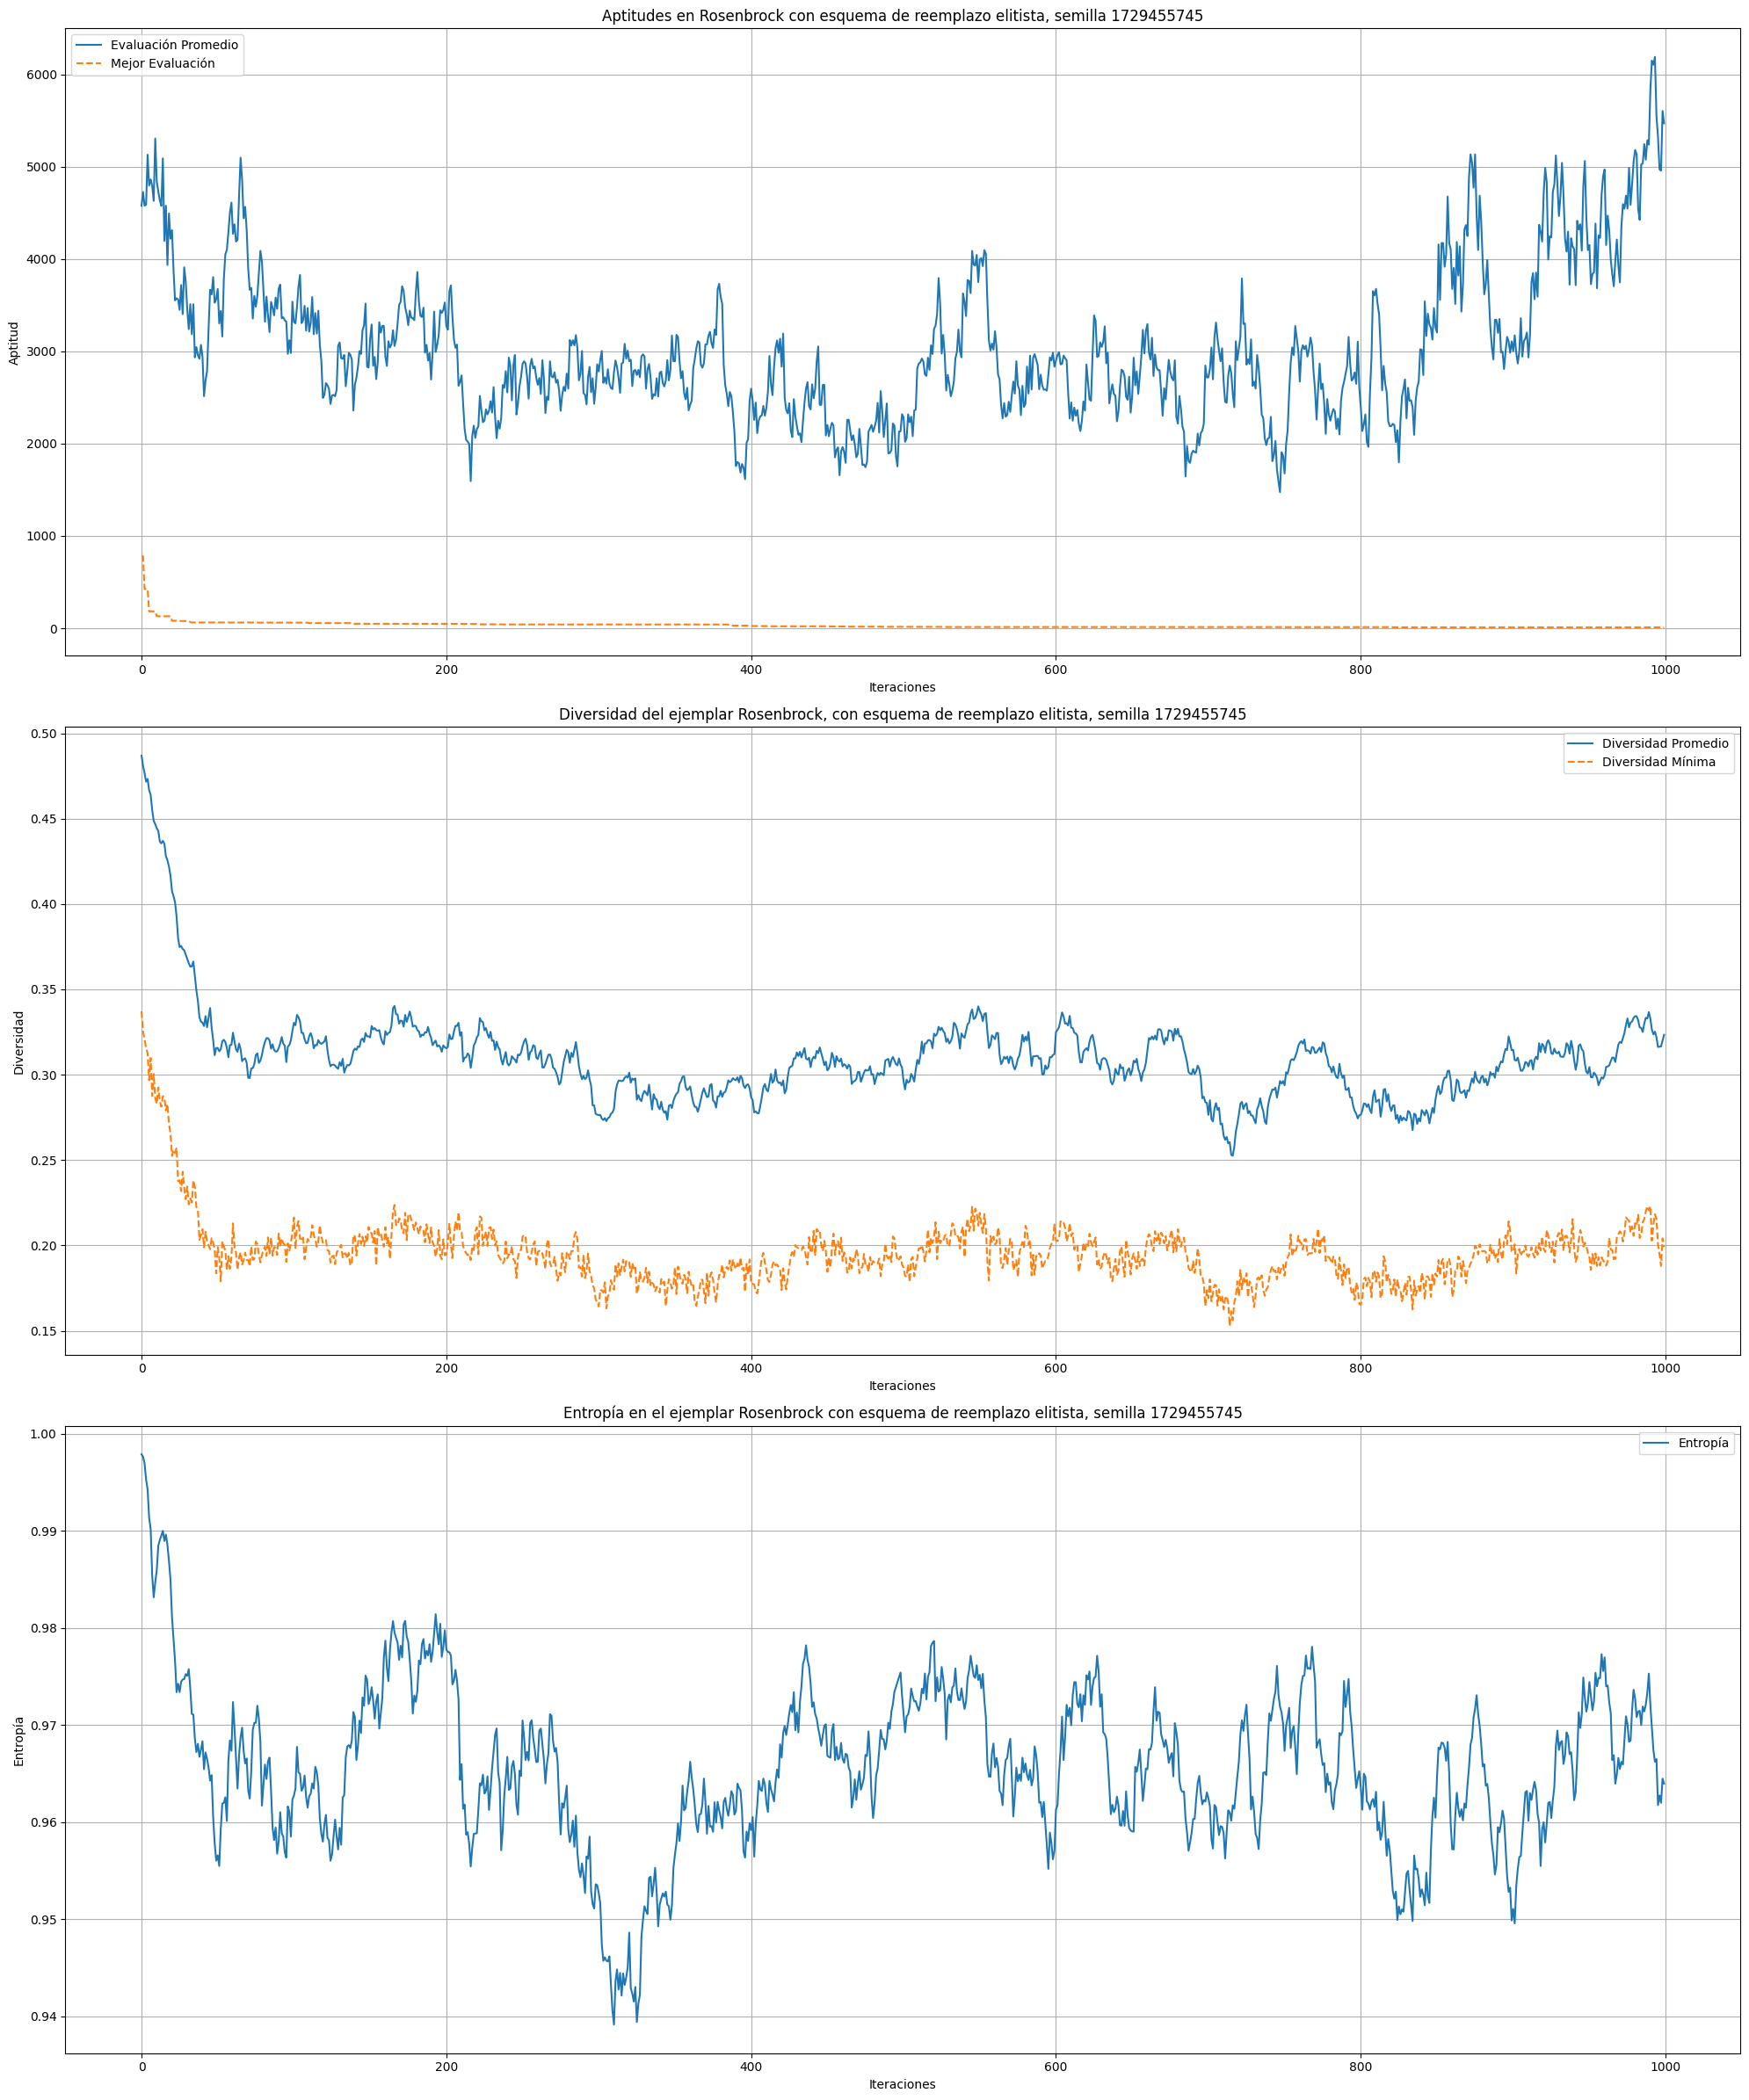

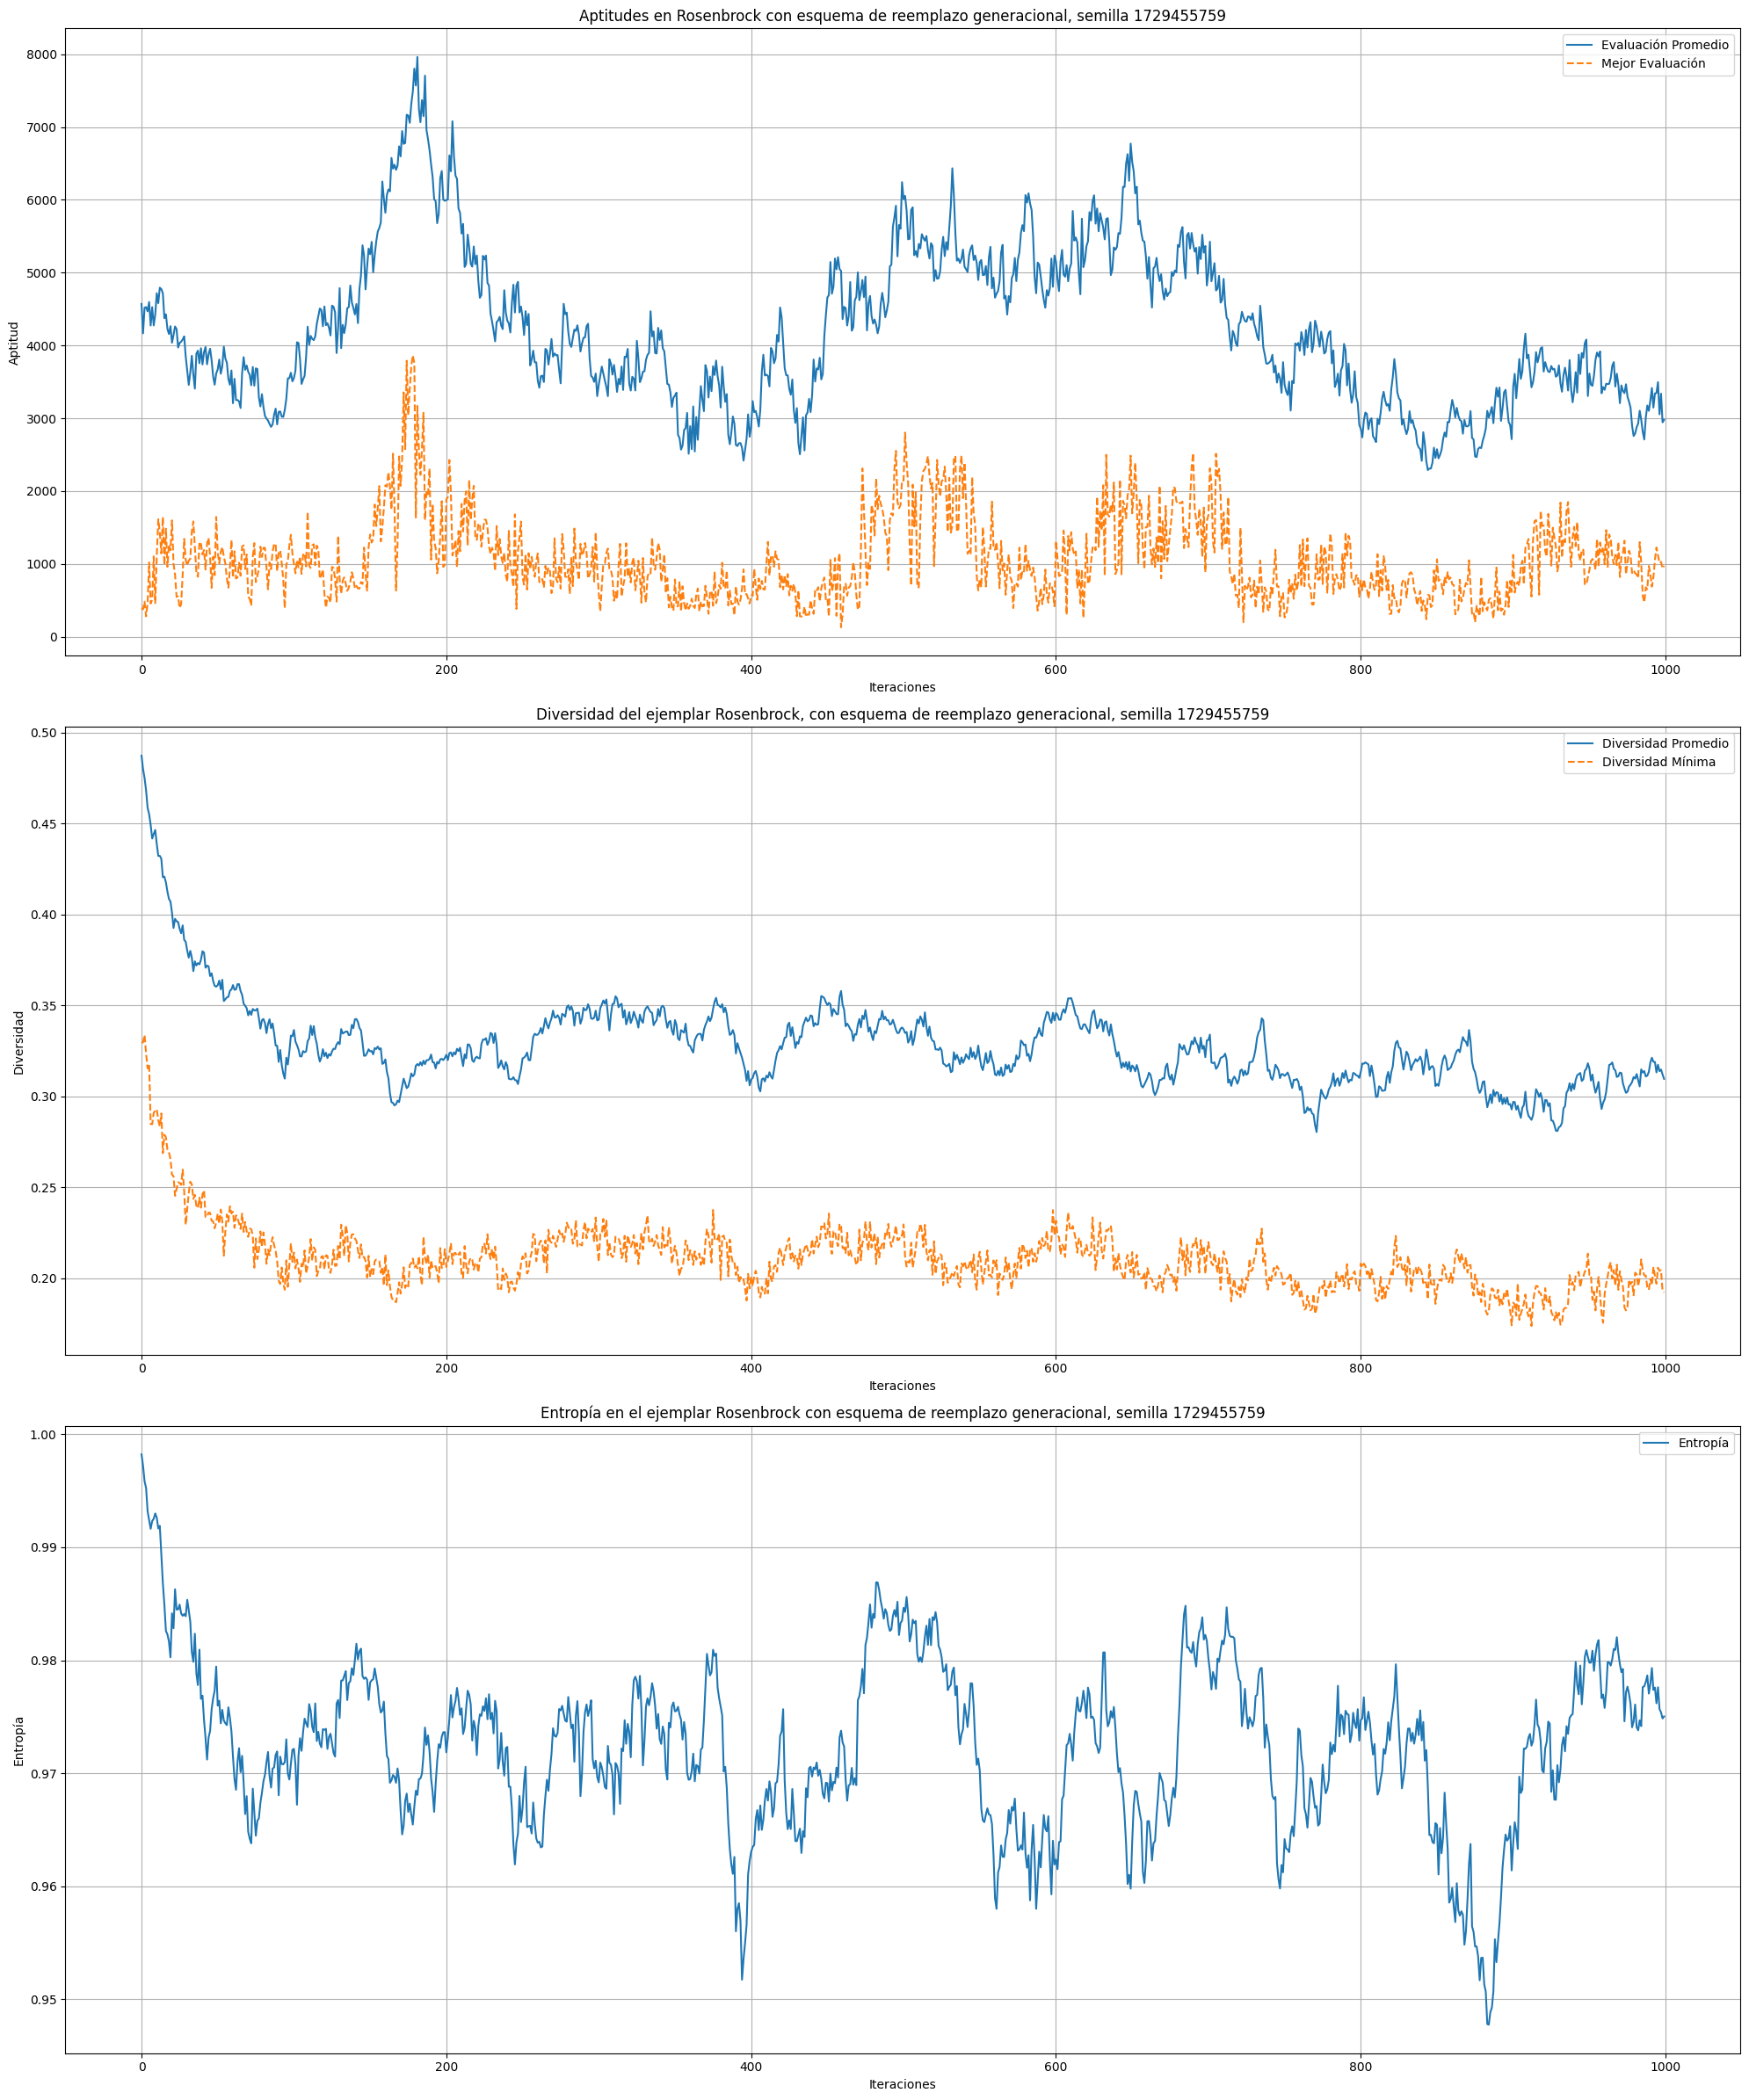

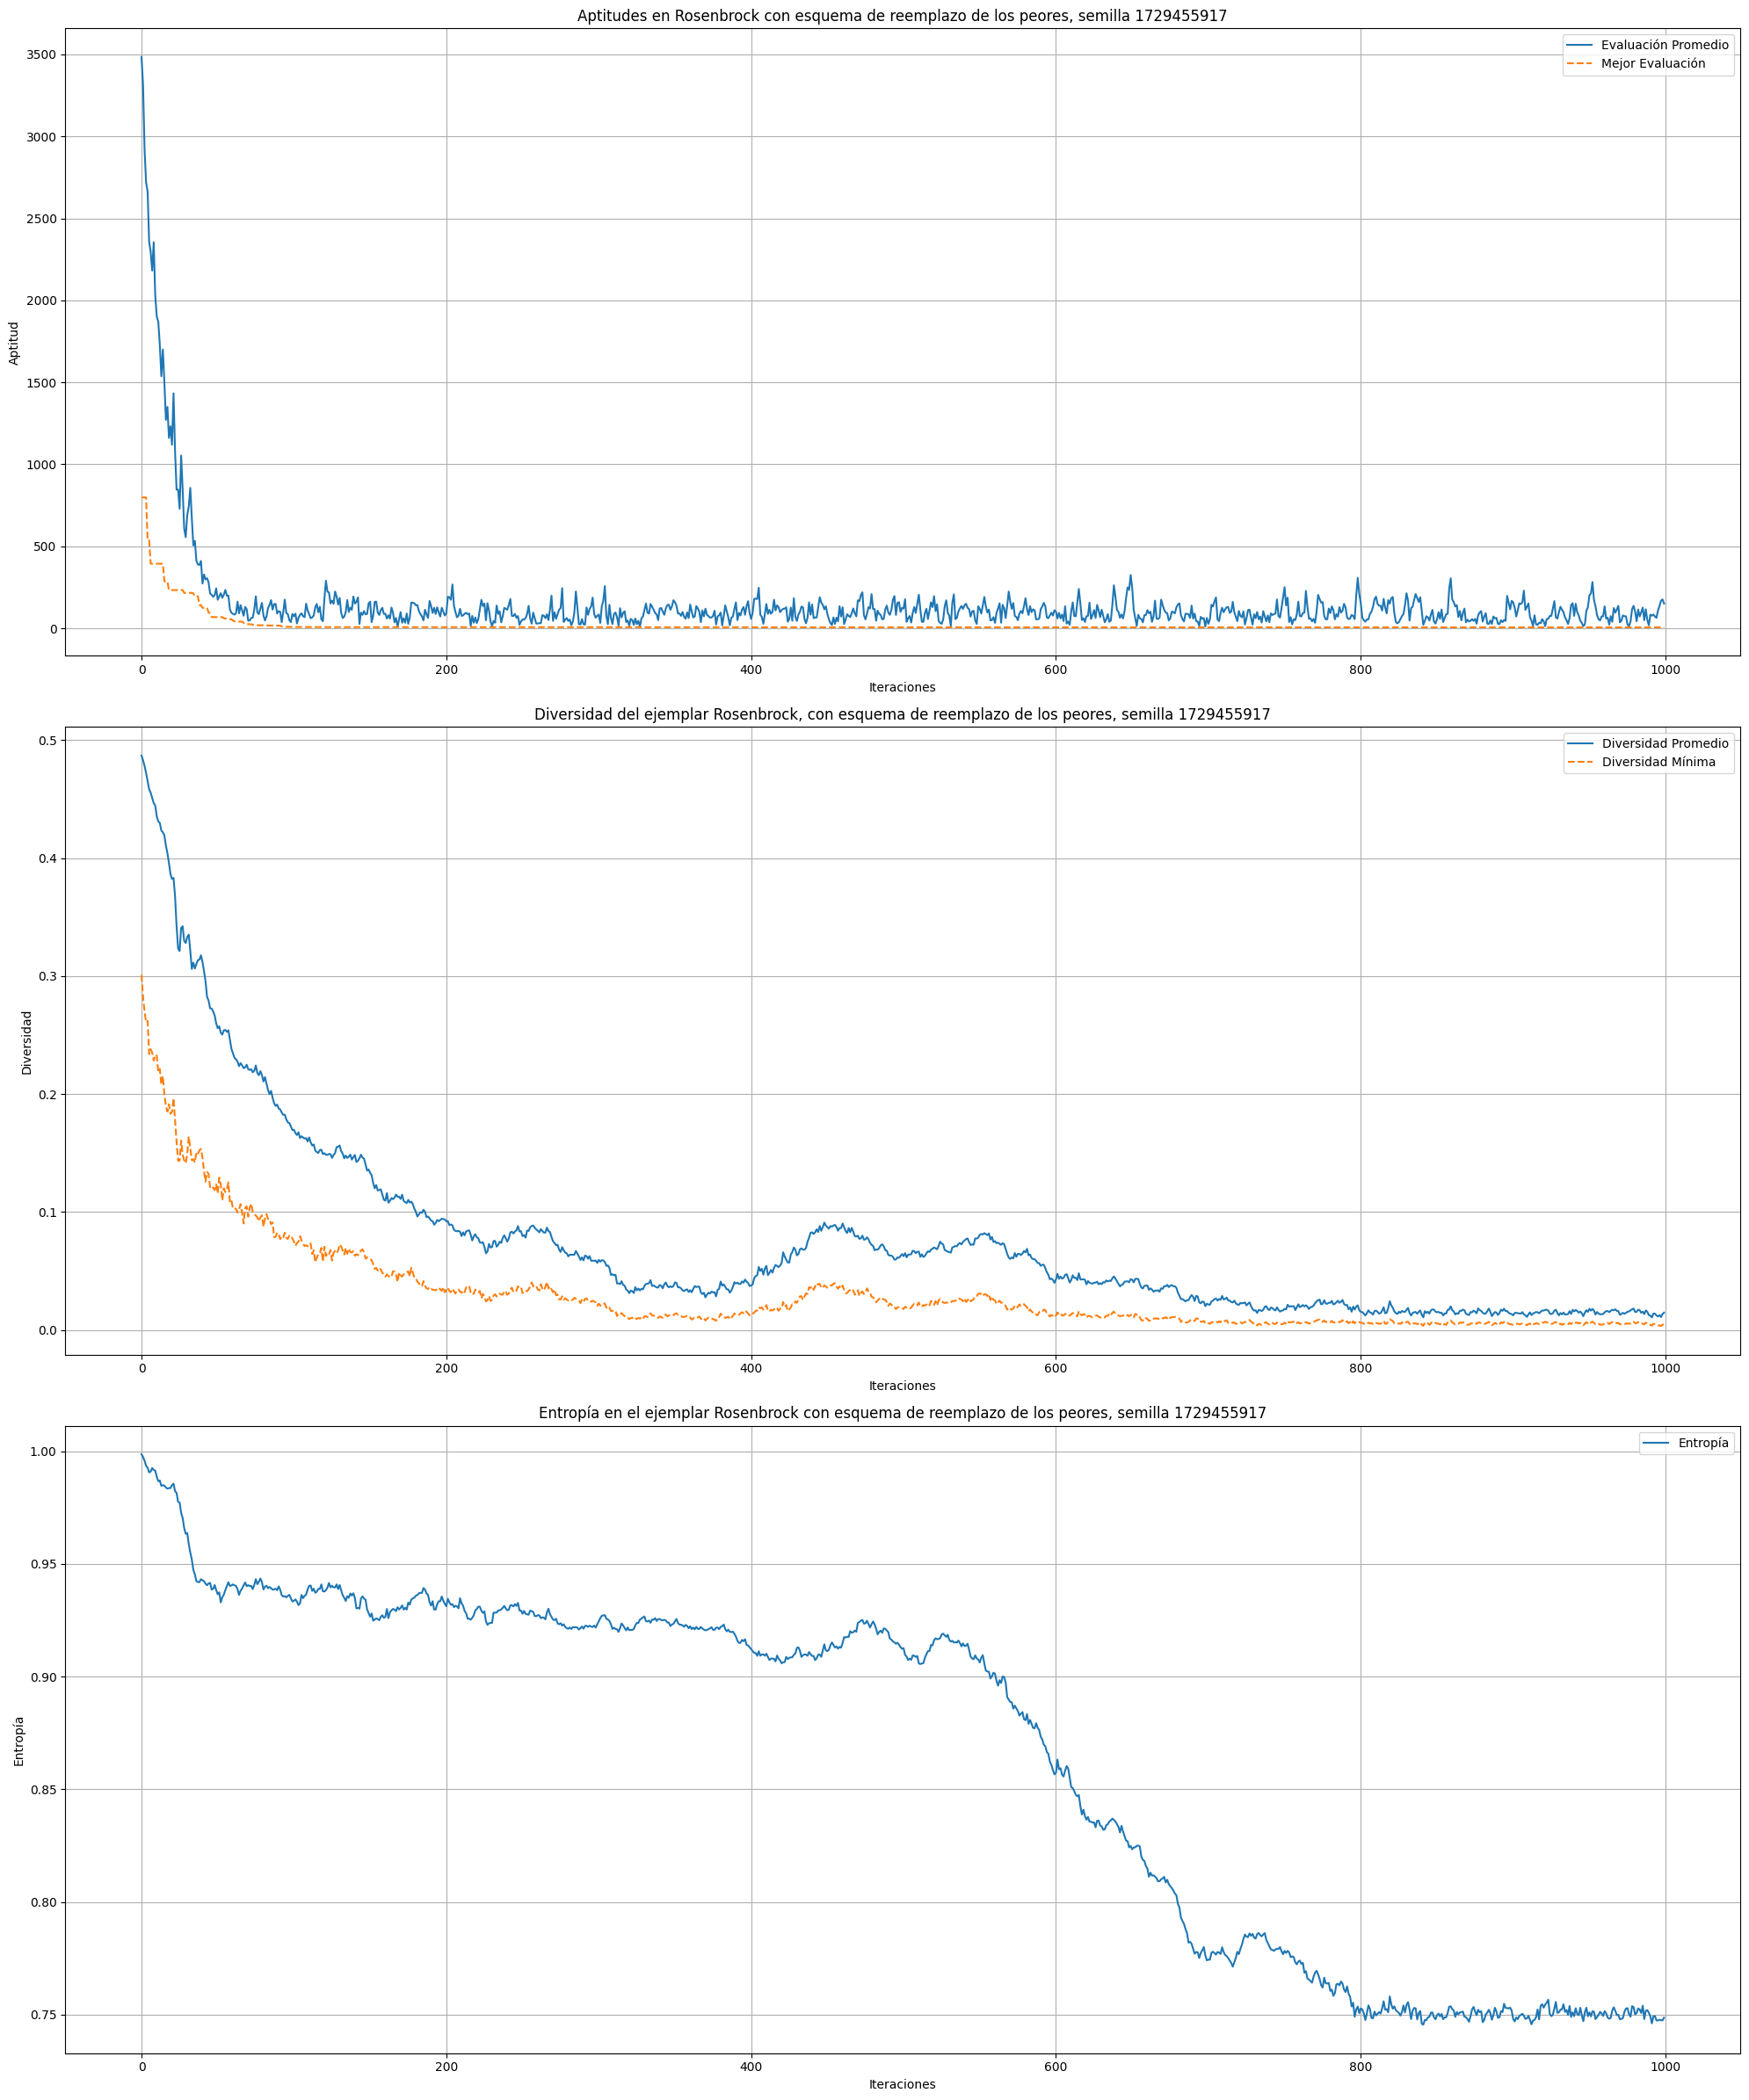

In [69]:
def ejecutar_algoritmo_y_graficar(ejecuciones=1, iteraciones=1000):
    funcion = Rosenbrock
    intervalo = intervaloRosenbrock
    dimension = 10
    kindividuos = 35
    nBits = 20
    nCortes = 15
    probaMutar = 0.1
    fraccionReemplazo = 0.5

    # Ponemos la semilla para el elitismo:
    seed = 1729455745
    np.random.seed(seed)

    # Ejecutamos el algoritmo para elitismo:
    aptitud_mejorE, aptitud_promedioE, diversidad_promE, diversidad_minE, entropia_generacionalE = AG_Reemplazo_Elitismo_Diversidad_Aptitud_Entropia(
        funcion, intervalo, dimension, kindividuos, nBits, nCortes, probaMutar, iteraciones
        )

    # Graficamos elitismo:
    graficar_resultados_Elitismo(aptitud_mejorE, aptitud_promedioE, diversidad_promE, diversidad_minE, entropia_generacionalE,
                        funcion='Rosenbrock', semilla=seed)
    

    # Ponemos la semilla para el generacional:
    seed = 1729455759
    np.random.seed(seed)

    # Ejecutamos el algoritmo para generacional:
    aptitud_mejorG, aptitud_promedioG, diversidad_promG, diversidad_minG, entropia_generacionalG = AG_Reemplazo_Generacional_Diversidad_Aptitud_Entropia(
        funcion, intervalo, dimension, kindividuos, nBits, nCortes, probaMutar, iteraciones
        )

    # Graficamos generacional:
    graficar_resultados_Generacional(aptitud_mejorG, aptitud_promedioG, diversidad_promG, diversidad_minG, entropia_generacionalG,
                        funcion='Rosenbrock', semilla=seed)
    
    
    
    # Ponemos la semilla para el de los peores:
    seed = 1729455917
    np.random.seed(seed)

    # Ejecutamos el algoritmo para peores:
    aptitud_mejorP, aptitud_promedioP, diversidad_promP, diversidad_minP, entropia_generacionalP = AG_Reemplazo_Peores_Diversidad_Aptitud_Entropia(
        funcion, intervalo, dimension, kindividuos, nBits, nCortes, probaMutar, iteraciones, fraccionReemplazo
        )

    # Graficamos peores:
    graficar_resultados_Peores(aptitud_mejorP, aptitud_promedioP, diversidad_promP, diversidad_minP, entropia_generacionalP,
                        funcion='Rosenbrock', semilla=seed)
    
    

ejecutar_algoritmo_y_graficar()
